<a href="https://colab.research.google.com/github/kavyasalian/ML_USING_log_regression/blob/master/redwinequality_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv("redwinequality.csv")

In [ ]:
grade = [] 
for i in df['quality']: 
    if i > 6.5:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
df['grade'] = grade 

In [ ]:
df.drop('quality', axis = 1, inplace = True)

In [ ]:
x = df.drop('grade', axis =1 )
x=df['fixed acidity']
y = df['grade']

In [ ]:
x=x.values;
y=y.values

In [ ]:
x = x/x.mean()

In [ ]:
n = int(0.8* len(x))
x_train = x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]

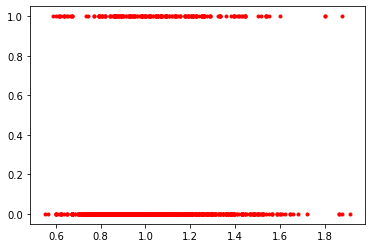

In [ ]:
plt.plot(x,y, 'r.')

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def error(a,b,x,y):
  error = 0
  m = len(x)
  for i in range(m):
    z = a*x[i] + b
    error +=y[i] * np.log(sigmoid(z)) + (1-y[i])*np.log(1-sigmoid(z)) 
  return (-1/m) *error

In [ ]:
def step_gradient(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(x)
  for i in range(m):
    z = a*x[i] + b
    grad_a += 1/m * (sigmoid(z)-y[i]) * x[i]
    grad_b += 1/m * (sigmoid(z)-y[i])
  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)

  return a,b

In [ ]:
def descend(initial_a, initial_b, x , y, learning_rate, iterations):
  a = initial_a
  b = initial_b
  for i in range(iterations):
    e = error(a,b,x,y)
    if i %1000 ==0:
      print(f'Error: {e}')
    a,b = step_gradient(a,b,x,y,learning_rate)
  return a,b

In [ ]:
def accuracy(theta, a,b,x,y):
  count = 0
  for j in range(len(x)):
    test = sigmoid(theta)

    if test[j] > 0.9:
      z = 1
    else:
      z = 0
    if y[j]==z:
      count += 1
  acc = count / len(y)
  print(f"Error is {100-(acc*100)}")
  print(f"accuracy is {acc*100}")

In [ ]:
a = 1
b = 1
learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a,b,x_train, y_train, learning_rate, iterations)

Error: 1.8429409048830019
Error: 0.4328226943825175
Error: 0.4310121173699873
Error: 0.43023028312786676
Error: 0.4294927759884619
Error: 0.42879365250025414
Error: 0.4281311114714723
Error: 0.42750343148611664
Error: 0.4269089534824798
Error: 0.42634608028437004


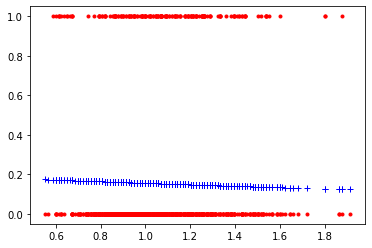

In [ ]:
f = final_a * x_train + final_b
plt.plot(x_train, y_train, 'r.', x_train, sigmoid(f), 'b+')

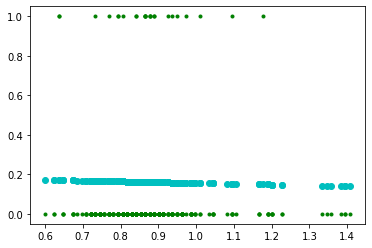

In [ ]:
g = final_a * x_test + final_b
plt.plot(x_test, y_test, 'g.', x_test, sigmoid(g), 'co')

In [ ]:
accuracy(f, final_a, final_b, x_train, y_train)
accuracy(g, final_a, final_b, x_test, y_test)

Error is 15.011727912431581
accuracy is 84.98827208756842
Error is 7.8125
accuracy is 92.1875
